In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Model

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vm-7-2-1-split/Final/test_set/vm/mask_25.png
/kaggle/input/vm-7-2-1-split/Final/test_set/vm/mask_86.png
/kaggle/input/vm-7-2-1-split/Final/test_set/vm/mask_84.png
/kaggle/input/vm-7-2-1-split/Final/test_set/vm/mask_11.png
/kaggle/input/vm-7-2-1-split/Final/test_set/vm/2275803_1_1_1_14.png
/kaggle/input/vm-7-2-1-split/Final/test_set/vm/2275803_1_1_1_10.png
/kaggle/input/vm-7-2-1-split/Final/test_set/vm/mask_85.png
/kaggle/input/vm-7-2-1-split/Final/test_set/vm/mask_14.png
/kaggle/input/vm-7-2-1-split/Final/test_set/vm/mask_89.png
/kaggle/input/vm-7-2-1-split/Final/test_set/vm/mask_87.png
/kaggle/input/vm-7-2-1-split/Final/test_set/vm/2275803_1_1_1_13.png
/kaggle/input/vm-7-2-1-split/Final/test_set/nonvm/mask_70.png
/kaggle/input/vm-7-2-1-split/Final/test_set/nonvm/mask_55.png
/kaggle/input/vm-7-2-1-split/Final/test_set/nonvm/mask_45.png
/kaggle/input/vm-7-2-1-split/Final/test_set/nonvm/mask_72.png
/kaggle/input/vm-7-2-1-split/Final/test_set/nonvm/mask_73.png
/kaggle/input/

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [73]:
tf.__version__

'2.15.0'

In [74]:
! ls /kaggle/input/vm-7-2-1-split/Final/train_set

nonvm  vm


In [75]:
! ls /kaggle/input/vm-7-2-1-split/Final/train_set/nonvm | head 

2191625_1_1_1_10.png
2191625_1_1_1_11.png
2191625_1_1_1_12.png
2275803_1_1_1_17.png
2275803_1_1_1_7.png
2294008_1_1_1_5.png
2294008_1_1_1_6.png
2294008_1_1_1_7.png
mask_1.png
mask_17.png


In [76]:
! ls /kaggle/input/vm-7-2-1-split/Final/train_set/vm | head 

2259769_1_1_1_10.png
2259769_1_1_1_11.png
2259769_1_1_1_12.png
2259769_1_1_1_13.png
2259769_1_1_1_14.png
2259769_1_1_1_9.png
2275803_1_1_1_11.png
2275803_1_1_1_12.png
2275803_1_1_1_8.png
2275803_1_1_1_9.png


In [77]:
PATH =  '/kaggle/input/vm-7-2-1-split/Final'
train_dir = os.path.join(PATH, 'train_set')
train_dir

'/kaggle/input/vm-7-2-1-split/Final/train_set'

In [78]:
# directory with our training dirty pictures
train_vm_dir = os.path.join(train_dir, 'vm')  
# directory with our training cleaned pictures
train_nonvm_dir = os.path.join(train_dir, 'nonvm')  
train_vm_dir, train_nonvm_dir

('/kaggle/input/vm-7-2-1-split/Final/train_set/vm',
 '/kaggle/input/vm-7-2-1-split/Final/train_set/nonvm')

In [79]:
num_vm_tr = len(os.listdir(train_vm_dir))
num_nonvm_tr = len(os.listdir(train_nonvm_dir))
num_vm_tr, num_nonvm_tr

(36, 51)

In [80]:
total_train = num_vm_tr + num_nonvm_tr
total_train

87

In [81]:
batch_size = 4
epochs = 25
IMG_SIZE = 224

In [82]:
def create_dataframe(path):
    data = []
    for value in os.listdir(path):
        for image in os.listdir(path + value + "/"):
            file_path = path + value + "/" + image
            # if hemmorhage than set if to 1 else 0
            hemmorhage = 1 if value.lower() == "vm" else 0
            data.append({"path": file_path, 'hemmorhage': hemmorhage})
            
    df = pd.DataFrame(data=data).sample(frac=1).reset_index(drop=True)

    return df

In [83]:
Test_Path = "/kaggle/input/vm-7-2-1-split/Final/test_set/"
Training_Path = "/kaggle/input/vm-7-2-1-split/Final/train_set/"
Validation_Path = "/kaggle/input/vm-7-2-1-split/Final/validation_set/"

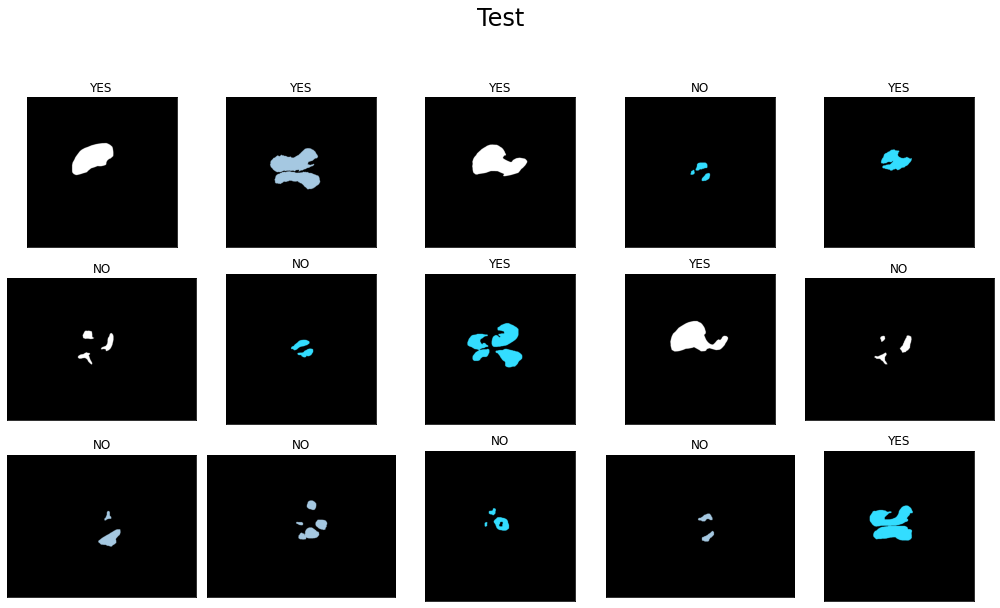

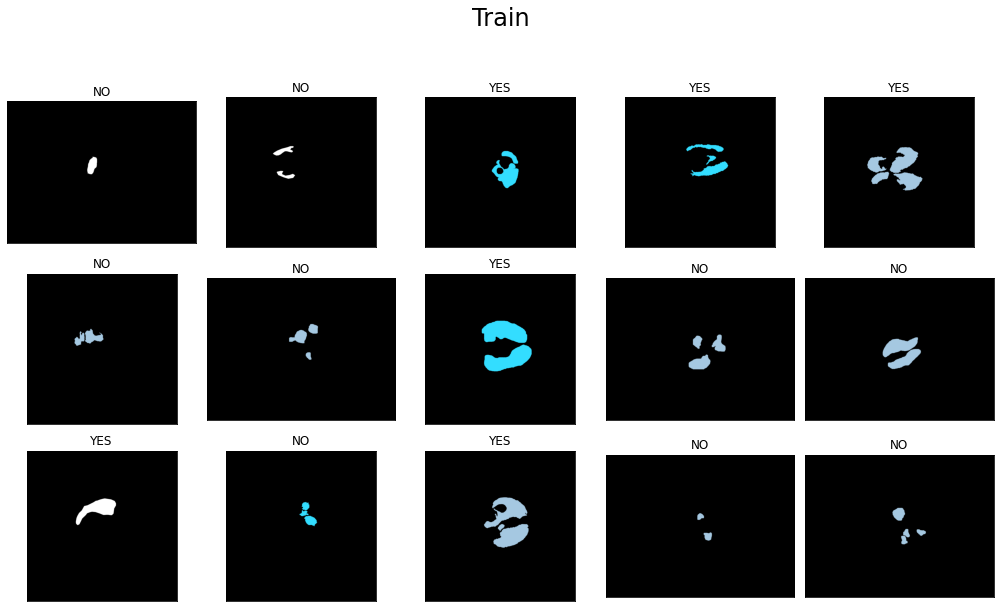

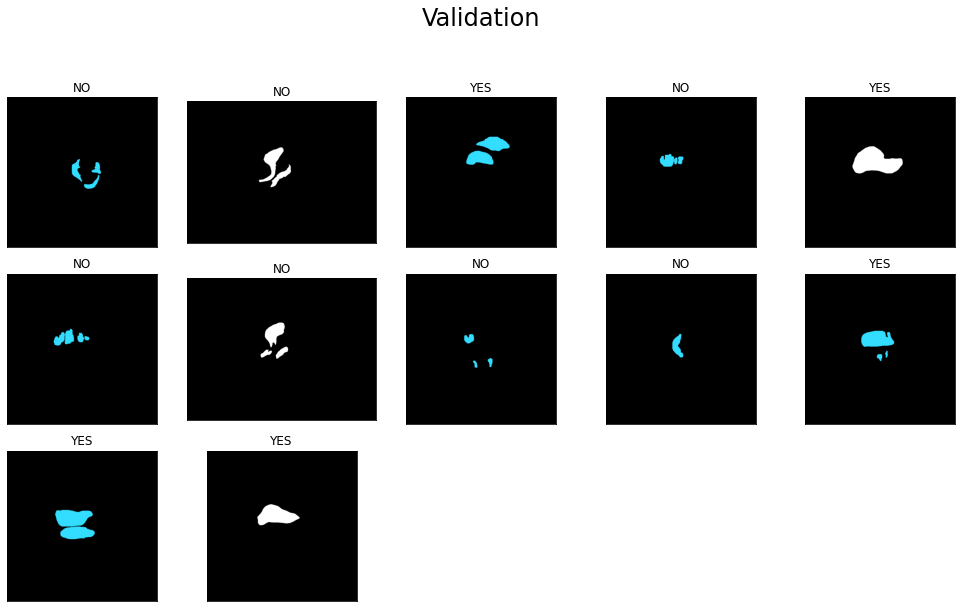

In [84]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Assuming Test_Path, Training_Path, and Validation_Path are defined somewhere in your code
# create_dataframe function is assumed to return a DataFrame with 'path' and 'hemmorhage' columns

def plot_imgs(title, paths):
    fig = plt.figure(figsize=(14, 8), dpi=72)
    fig.suptitle(title, fontsize=24, y=1.05)
    num_images = min(15, len(paths))  # Limit the number of images to 15 or the size of the population
    for i in range(num_images):
        img = mpimg.imread(paths.iloc[i]['path'])
        plt.subplot(3, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        subtitle = 'YES' if paths.iloc[i]['hemmorhage'] == 1 else 'NO'
        plt.title(subtitle)
        plt.imshow(img)
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None)
    plt.show()

# Assuming create_dataframe function is defined elsewhere
# Ensure that it returns a DataFrame with 'path' and 'hemmorhage' columns

# Now you can call the function with your data
# Assuming create_dataframe function is defined elsewhere
# Assuming Test_Path, Training_Path, and Validation_Path are defined elsewhere
# Sample the data if it's larger than 15
test_data = create_dataframe(Test_Path)
train_data = create_dataframe(Training_Path)
validation_data = create_dataframe(Validation_Path)

plot_imgs("Test", test_data.sample(min(15, len(test_data))).reset_index(drop=True))
plot_imgs("Train", train_data.sample(min(15, len(train_data))).reset_index(drop=True))
plot_imgs("Validation", validation_data.sample(min(15, len(validation_data))).reset_index(drop=True))

In [85]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=15,
                    width_shift_range=.1,
                    height_shift_range=.1,
                    horizontal_flip=True,
                    zoom_range=0.1, 
                    brightness_range=[0.8,1.0]
                    )

In [86]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='binary', 
)

Found 87 images belonging to 2 classes.


In [87]:
val_dir="/kaggle/input/vm-7-2-1-split/Final/validation_set"
validation_datagen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=val_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='binary', 
)

Found 12 images belonging to 2 classes.


In [89]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(  
        '/kaggle/input/vm-7-2-1-split/Final/test_set',
        classes=['nonvm','vm'],
        target_size = (IMG_SIZE, IMG_SIZE),
        batch_size = 32,
        shuffle = True,        
        class_mode = 'binary')  

Found 26 images belonging to 2 classes.


In [90]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [91]:
sample_training_images, _ = next(train_data_gen)


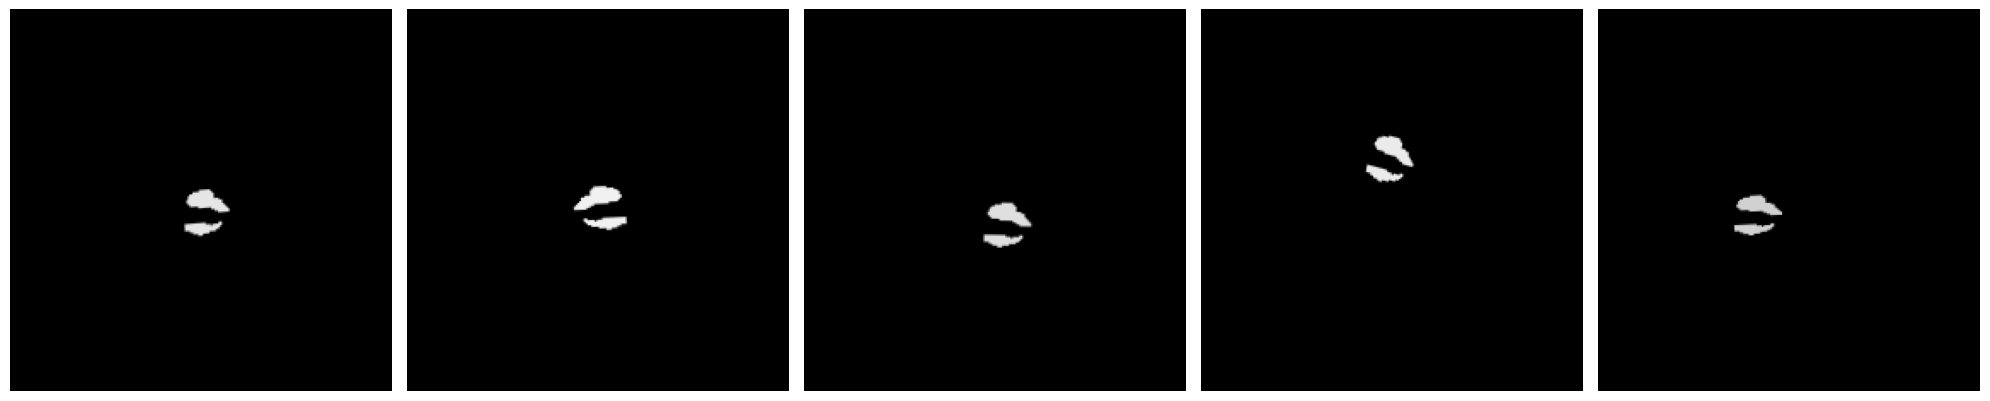

In [92]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [93]:
IMG_SHAPE=(IMG_SIZE, IMG_SIZE, 3)
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

In [94]:
base_model.trainable = False

In [95]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [96]:
image_batch = sample_training_images[:batch_size]
image_batch.shape

(4, 224, 224, 3)

In [97]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(4, 7, 7, 1280)


In [98]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(4, 1280)


In [99]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(4, 1)


In [113]:
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the MobileNetV2 model
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout layer with 0.5 dropout rate
x = Dropout(0.5)(x)

# Add another fully connected layer with 1 unit for binary classification and sigmoid activation
prediction = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=prediction)



In [114]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [115]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 34,371,649 (131.12 MB)

 Trainable params: 32,113,665 (122.50 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [117]:

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = model.fit(train_data_gen,
                    epochs=25, 
                    validation_data=validation_datagen,
                    callbacks=[es, mc]
                    )

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.7269 - loss: 13.5090
Epoch 1: accuracy improved from -inf to 0.74713, saving model to best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 663ms/step - accuracy: 0.7278 - loss: 13.6950 - val_accuracy: 0.5833 - val_loss: 19.4599
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7291 - loss: 21.4423
Epoch 2: accuracy improved from 0.74713 to 0.78161, saving model to best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 545ms/step - accuracy: 0.7314 - loss: 21.2166 - val_accuracy: 0.5833 - val_loss: 21.7788
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.9028 - loss: 2.5883
Epoch 3: accuracy improved from 0.78161 to 0.90805, saving model to best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 547ms/step - accuracy: 0.9030 - loss: 2.6381 - val_accuracy: 0.6667 - val_loss: 15.4449
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.9300 - loss: 2.7279
Epoch 4: accuracy did not improve from 0.90805
22/22 ━

In [118]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [119]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import accuracy_score
import cv2


def preprocess_imgs(path, img_size):
    set_new = []
    for value in os.listdir(path):
        for img in os.listdir(os.path.join(path, value)):
            img_path = os.path.join(path, value, img)
            img = cv2.imread(img_path)
            img = cv2.resize(img, dsize=img_size, interpolation=cv2.INTER_CUBIC)
            img = preprocess_input(img)
            set_new.append(img)
    return np.array(set_new)

# Define the test data directory path and image size
Test_Path = "/kaggle/input/vm-7-2-1-split/Final/test_set"
IMG_SIZE = (224, 224)

# Preprocess test data
test_data = preprocess_imgs(Test_Path, img_size=IMG_SIZE)

# Define the ground truth labels
reality = []
for value in os.listdir(Test_Path):
    for img in os.listdir(os.path.join(Test_Path, value)):
        reality.append(1 if value.lower() == "vm" else 0)
# Predict using the model
predictions = model.predict(test_data)
predictions = [1 if x > 0.5 else 0 for x in predictions]  # Assuming binary classification
# Calculate test accuracy
accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Test Accuracy: 0.5


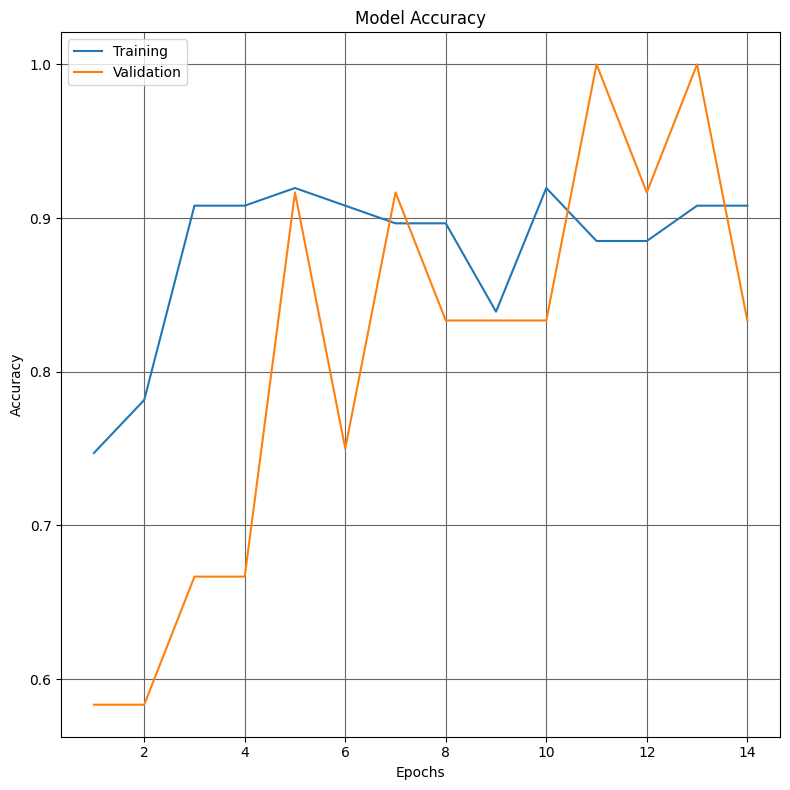

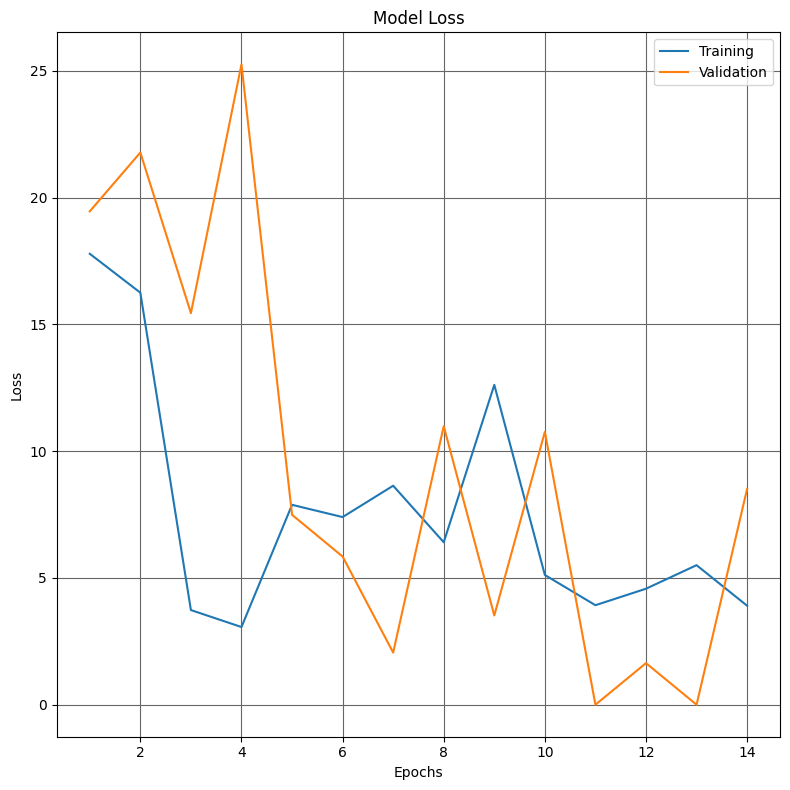

In [120]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(history.epoch) + 1)


plt.figure(figsize=(8,8))

plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,8))

plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()

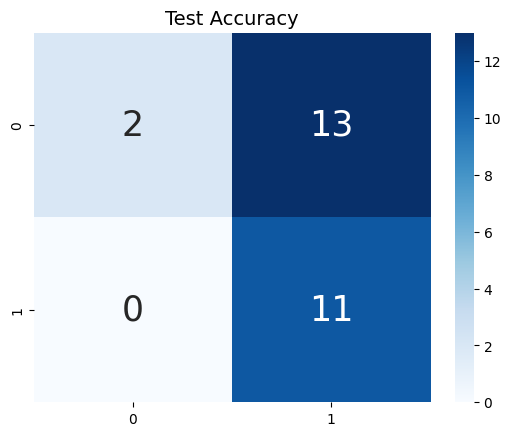

In [121]:
from sklearn.metrics import  confusion_matrix
import seaborn as sn

confusion_mtx = confusion_matrix(reality, predictions)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,annot_kws={"size": 25}, cmap="Blues", ax = ax)
ax.set_title('Test Accuracy', size=14)
plt.show()

## LIME


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

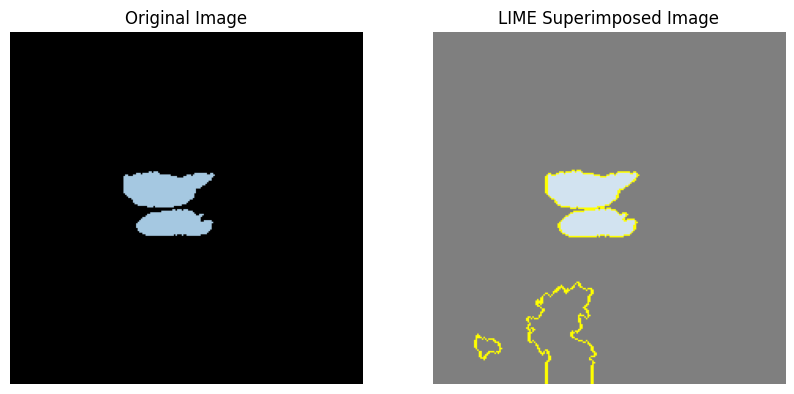

In [122]:
import numpy as np
import tensorflow as tf
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Function to apply LIME to a sample image
def apply_lime(model, img_path):
    explainer = lime_image.LimeImageExplainer()

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Resize to match VGG16 input size
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image data
    img_array = img_array.astype(np.double)  # Cast to double

    # Define the predict function for the model
    def predict_function(images):
        preds = model.predict(images)
        return preds

    # Explain the instance
    explanation = explainer.explain_instance(img_array, predict_function, top_labels=1, hide_color=0, num_samples=1000)

    # Get processed image
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

    # Create superimposed image
    superimposed_img = mark_boundaries(temp / 2 + 0.5, mask)

    return superimposed_img

# Apply LIME to a sample image from the test set
sample_img_path = "/kaggle/input/vm-7-2-1-split/Final/train_set/vm/mask_16.png"
lime_img = apply_lime(model, sample_img_path)

# Display the original image and the LIME superimposed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(tf.keras.preprocessing.image.load_img(sample_img_path, target_size=(224, 224)))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lime_img)
plt.title('LIME Superimposed Image')
plt.axis('off')

plt.show()

## LIME V2

In [123]:
def lime_over_image(model, img_path, expected_class, layer_name):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    grad_model = Model(model.inputs, [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_index = np.argmax(predictions[0])
        loss = predictions[:, class_index]
        
    predicted_class = np.argmax(predictions[0])  # Predict the class using the model
    sample_img_path = img_path
    

    if predicted_class == expected_class:
        lime_img = apply_lime(model, sample_img_path)
        print("Positive case of VM")
        plt.imshow(lime_img)
        plt.title('LIME Superimposed Image')
        plt.axis('off')

        plt.show()
        

    else:
        print("Non VM")
        plt.figure(figsize=(10, 5))
        plt.imshow(tf.keras.preprocessing.image.load_img(sample_img_path, target_size=(220, 220)))
        plt.title('Original Image')
        plt.axis('off')
        plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

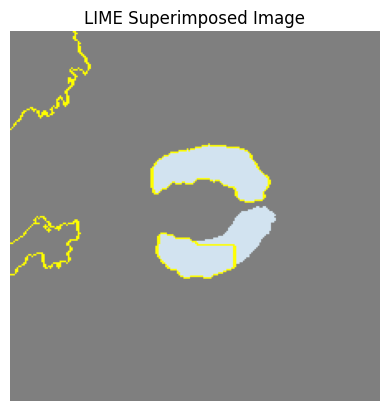

In [124]:
img_path1 = "/kaggle/input/vm-7-2-1-split/Final/train_set/vm/mask_6.png"
layer_name = "block_16_project_BN"

lime_over_image(model, img_path1, 0, layer_name)


Non VM


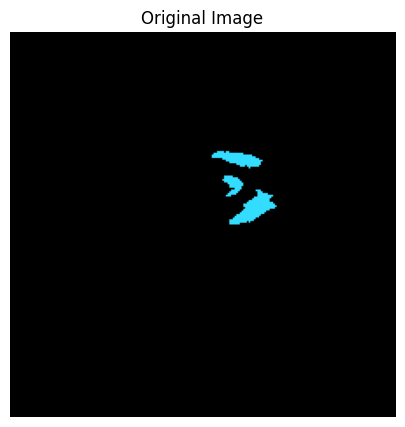

In [125]:
img_path1 = "/kaggle/input/vm-7-2-1-split/Final/train_set/nonvm/mask_36.png"
lime_over_image(model, img_path1, 1, layer_name)


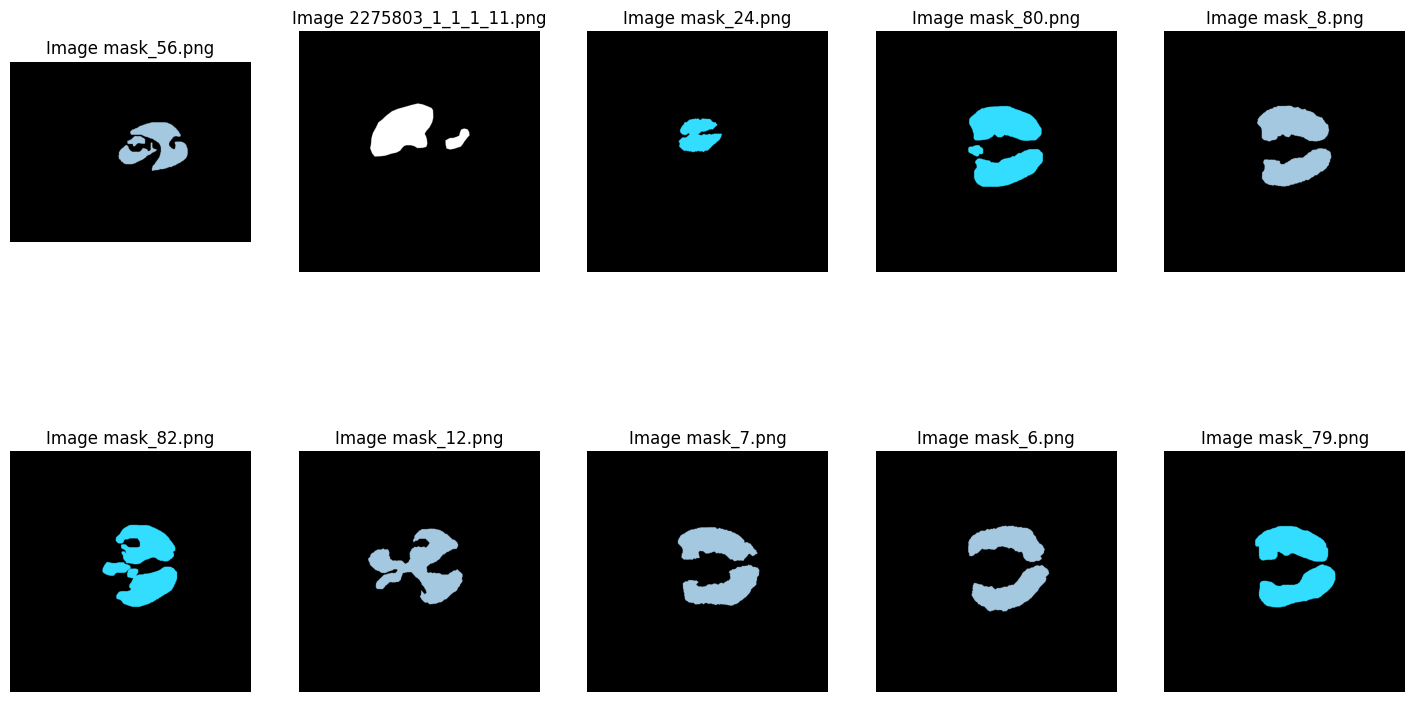

In [130]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from matplotlib import cm

plt.figure(figsize=(18, 10))
rows, cols = 2, 5

directory = '/kaggle/input/vm-7-2-1-split/Final/train_set/vm'  # Update this with the path to your directory
files = os.listdir(directory)[:10]  # List the first 10 files in the directory

processed_img_list = []
class_label_list = []
for i, file in enumerate(files):
    plt.subplot(rows, cols, i+1)
    img_path = os.path.join(directory, file)
    plt.title(f'Image {file}')
    plt.axis('off')
    plt.imshow(mpimg.imread(img_path))

    # Preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    processed_img_list.append(x)
    

plt.show()


## GradCAM

In [131]:

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
    model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
)


    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [132]:
# Function to superimpose heatmap onto original image
import matplotlib
def save_and_display_gradcam(img_array, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = matplotlib.colormaps.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img_array.shape[1], img_array.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img_array
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    return superimposed_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


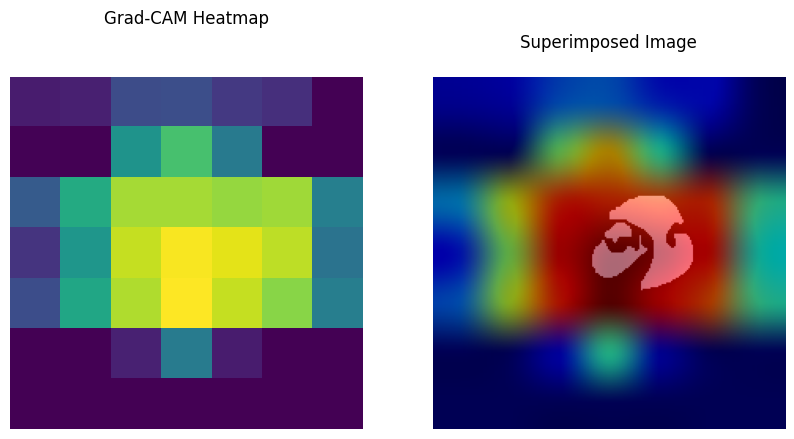

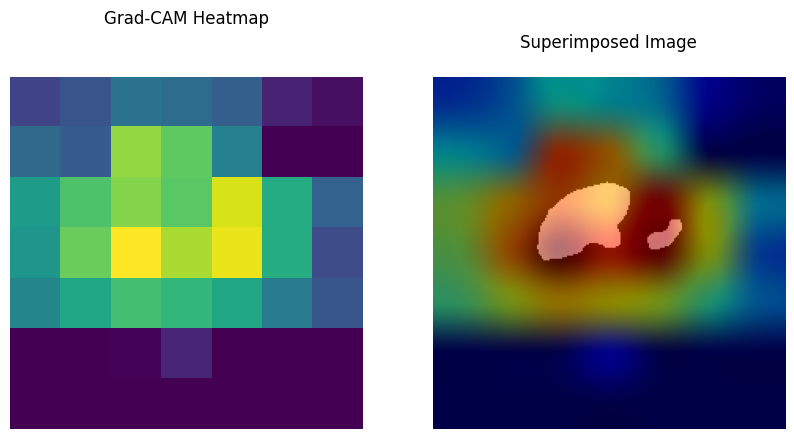

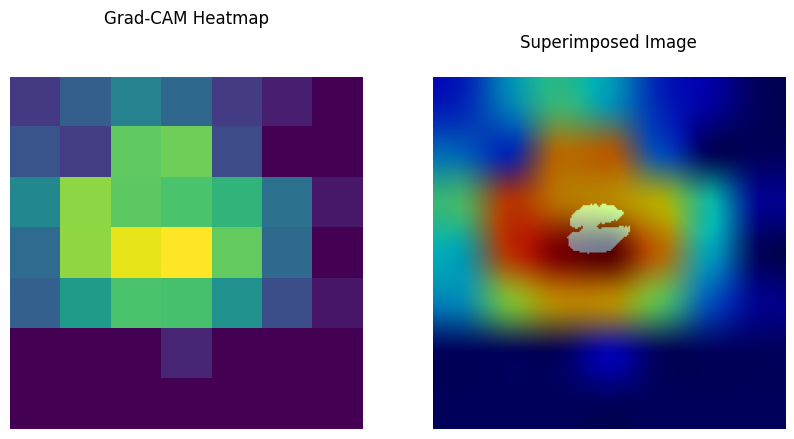

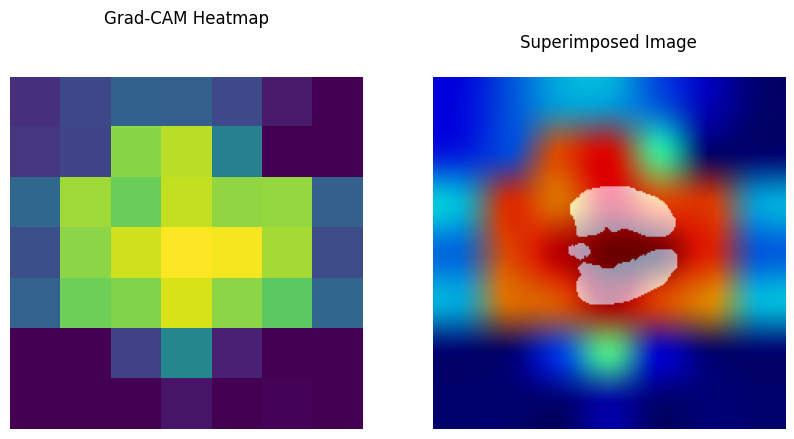

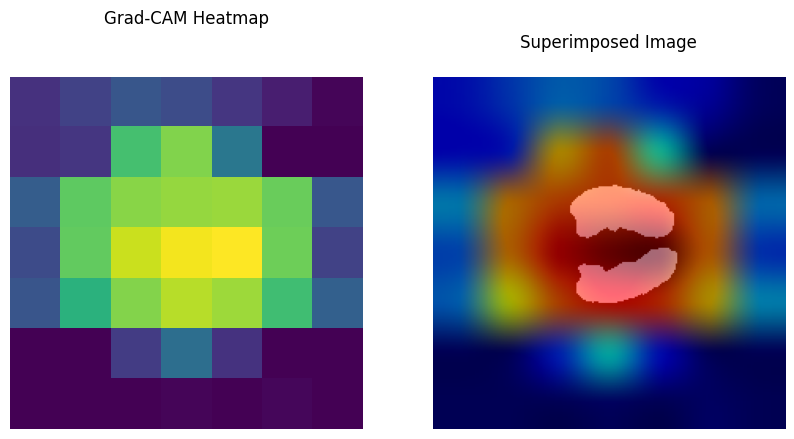

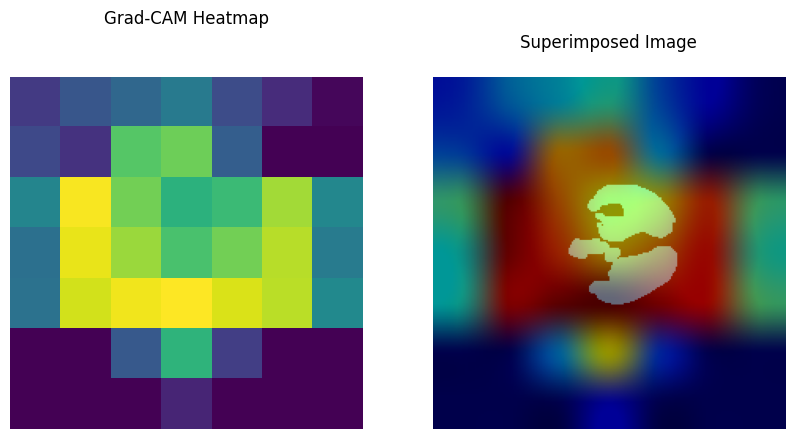

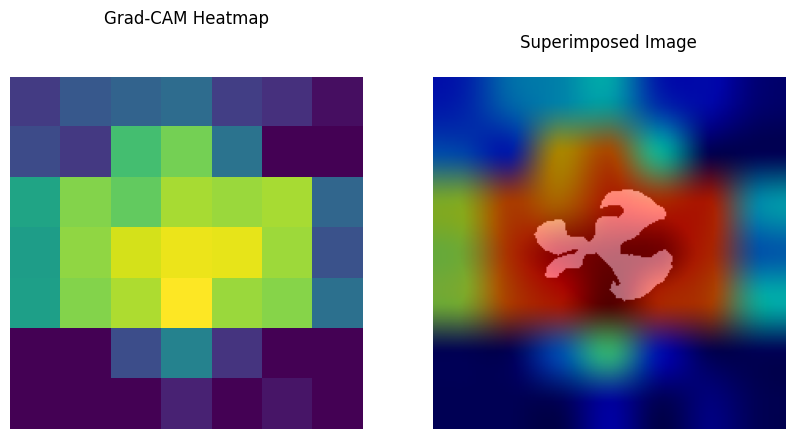

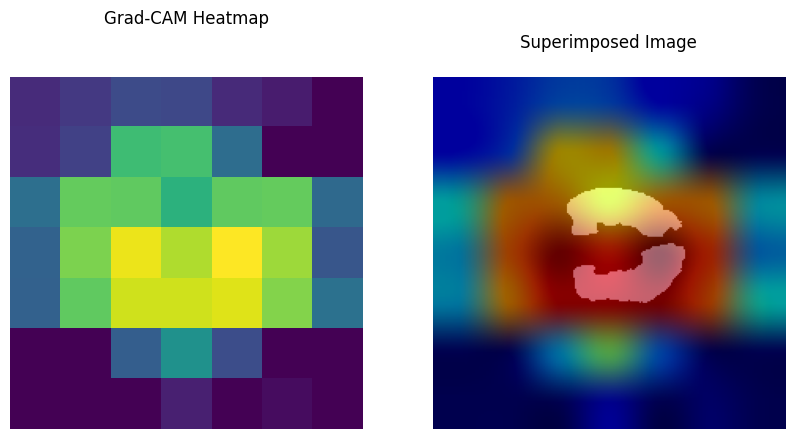

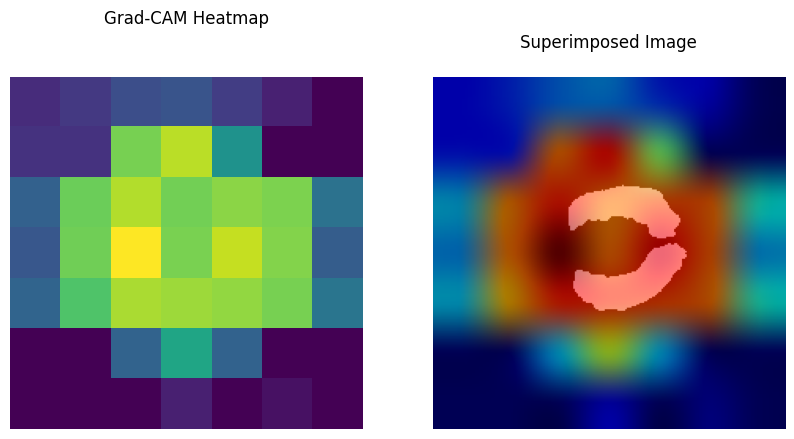

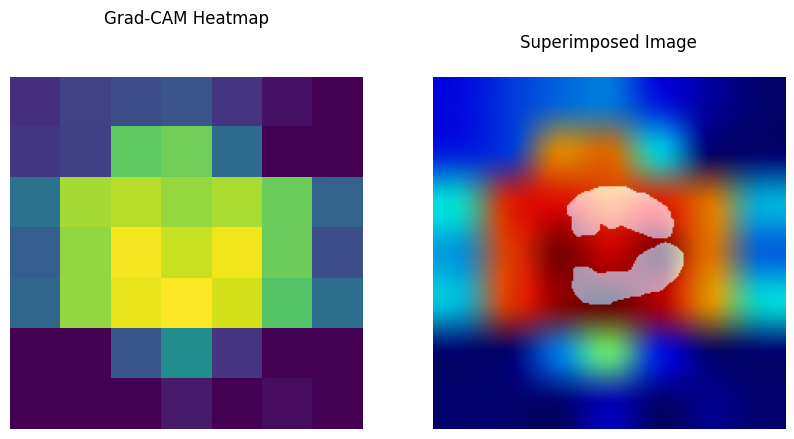

In [135]:
import keras
for index in range(0,len(processed_img_list)):
    # Iterate over each image
    x = processed_img_list[index]
    image_title = f"{str.split(files[index], '.')[0]}_results.png"
    
    # Remove last layer's softmax
    model.layers[-1].activation = None

    # Print the top predicted class
    preds = model.predict(x)

    # Get the name of the last convolutional layer
    last_conv_layer_name = "Conv_1"
    
    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(x, model, last_conv_layer_name)

    # Superimpose heatmap on the image
    return_img = save_and_display_gradcam(x.reshape(224,224,3), heatmap, alpha=0.01)  # Pass the image path

    fig, axs = plt.subplots(1, 2, figsize=(10, 6))
    axs[0].matshow(heatmap)
    axs[0].axis('off')
    axs[0].set_title('Grad-CAM Heatmap\n'.format(a[1], a[2]*100))
    axs[1].imshow(return_img)
    axs[1].axis('off')
    axs[1].set_title('Superimposed Image\n'.format(a[1], a[2]*100))


## GRADCAM V.2

In [136]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image



def grad_cam(model, img_path, expected_class, layer_name):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    grad_model = Model(model.inputs, [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_index = np.argmax(predictions[0])
        loss = predictions[:, class_index]

    predicted_class = np.argmax(predictions[0])  # Predict the class using the model

    if predicted_class == expected_class:
        grads = tape.gradient(loss, conv_output)[0]

        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

        conv_output = conv_output[0]

        heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
        heatmap = np.maximum(heatmap, 0)

        max_heatmap = np.max(heatmap)
        if max_heatmap == 0:
            # Handle division by zero
            heatmap_resized = heatmap
        else:
            heatmap /= max_heatmap

            # Reshape heatmap to have an additional dimension
            heatmap = np.expand_dims(heatmap, axis=-1)

            # Get the shape of the original input image
            original_img = image.load_img(img_path, target_size=(224, 224))
            original_img_shape = original_img.size

            # Resize the heatmap to match the original input image size
            heatmap_resized = tf.image.resize(heatmap, original_img_shape, method='bilinear').numpy()

            # Normalize the heatmap for visualization
            heatmap_resized = heatmap_resized - np.min(heatmap_resized)
            heatmap_resized = heatmap_resized / np.max(heatmap_resized)

        print("Positive case of VM")

        plt.imshow(heatmap_resized[:, :, 0], cmap='jet', alpha=0.6)  # Overlay heatmap on the image
        plt.imshow(original_img, alpha=0.5)  # Plot the original image
        plt.axis('off')
        plt.show()
    else:
        print("Non VM")
        # If predicted class doesn't match expected class, just display the original image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

expected_class = 0

# Specify the layer for GradCAM
layer_name = "block_16_project_BN"



Non VM


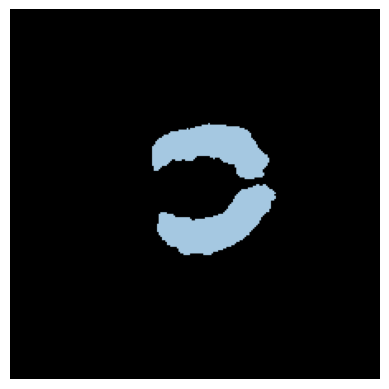

In [142]:
img_path1 = "/kaggle/input/vm-7-2-1-split/Final/train_set/vm/mask_6.png"
grad_cam(model, img_path1, 1, layer_name)

Positive case of VM


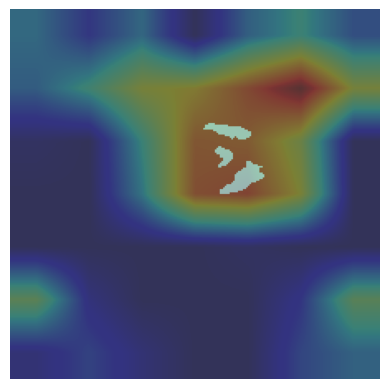

In [143]:
img_path1 = "/kaggle/input/vm-7-2-1-split/Final/train_set/nonvm/mask_36.png"
grad_cam(model, img_path1, 0, layer_name)

## **SHAP**

In [144]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions


In [145]:
image_dir = "/kaggle/input/vm-7-2-1-split/Final/train_set/vm"

# List to store images and labels
images = []
labels = []

# Iterate over the images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        img = Image.open(os.path.join(image_dir, filename))
        # Preprocess the image (resize, convert to array, and apply preprocessing)
        img = img.resize((224, 224))  # Resize the image if needed
        img_array = np.array(img)
        img_array = preprocess_input(img_array)
        # Append the preprocessed image to the list of images
        images.append(img_array)
        # Extract the label from the filename (you'll need to customize this based on your filename format)
        label = filename.split("_")[0]  # Assuming the label is the first part of the filename before underscore
        labels.append(label)

# Convert the lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Print the shape of the arrays
print("Shape of X (images):", X.shape)
print("Shape of y (labels):", y.shape)

Shape of X (images): (36, 224, 224, 3)
Shape of y (labels): (36,)


In [147]:
import shap

# Define a function to preprocess the input image and pass it through the model
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# Define the masker
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# Create the explainer
explainer_blur = shap.Explainer(f, masker_blur)

# Explain the SHAP values for the images
shap_values_fine = explainer_blur(
    X[1:6], max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:2]  # Changed to 2 classes
)


  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|██        | 1/5 [00:00<?, ?it/s]

  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|██████    | 3/5 [00:54<00:25, 12.83s/it]

  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████  | 4/5 [01:19<00:18, 18.03s/it]

  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|██████████| 5/5 [01:44<00:00, 20.78s/it]

  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [02:10, 26.15s/it]                       


In [148]:
print(shap_values_fine.shape)

(5, 224, 224, 3, 1)


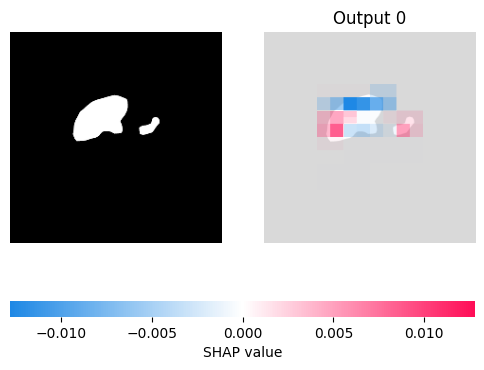

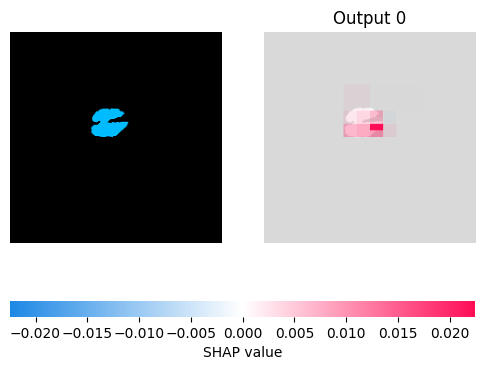

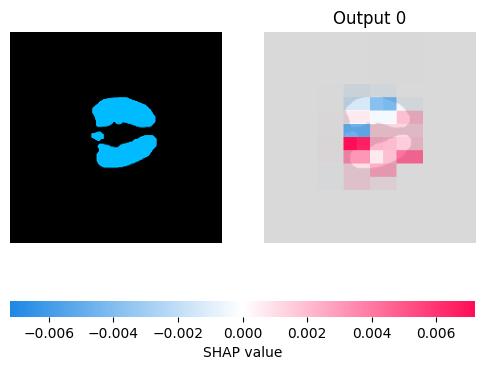

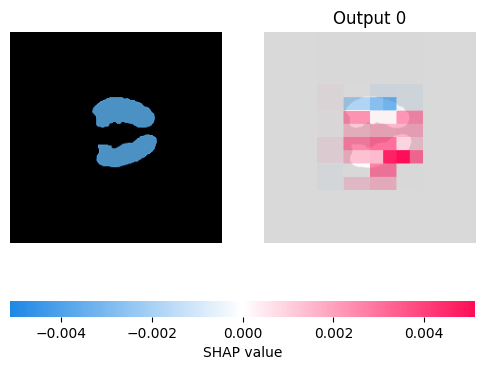

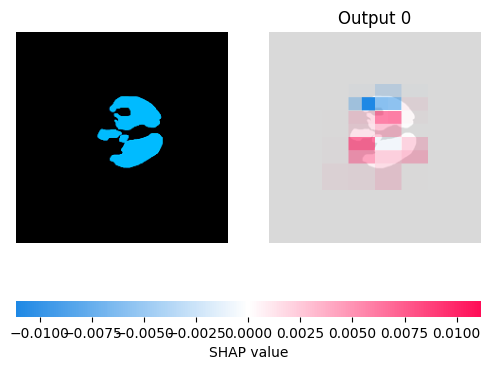

In [149]:
# Plot SHAP values for the first image and the first output class
for i in range(shap_values_fine.shape[0]):
        # Plot SHAP values for the current sample and output class
        shap.image_plot(shap_values_fine[i])


